# Introdução

O objetivo desse projeto é criar um modelo que seja capaz de identificar corretamente o perfil de clientes que dão Churn para que, dessa forma, a equipe de marketing possa trabalhar em uma campanha de fidelização, ou fornecer incentivos a permanência desses clientes.

O churn é uma métrica que indica os clientes que cancelam o serviço em determinado período de tempo, neste caso os clientes que cancelariam sua conta no banco.

Dados de clientes de um banco foram disponibilizados em um dataset no Kaggle. O dataset compõe dados de score de crédito, país de origem, idade, sexo biologico, anos de cliente, saldo em conta, número de produtos adquiridos, salário estimado e dados booleanos se possuem cartão de crédito e se é membro ativo. Cada cliente foi rotulado em clientes que deram churn (cancelaram suas contas) (rótulo = 1) e não deram churn (não cancelaram suas contas) (rótulo = 0).

Base de dados original foi levemente simplificada.

https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers


Importa os dados e excluir a coluna id_cliente.

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/mcalsing/predict-churn-clients/main/churn.csv')
dados = dados.drop('id_cliente', axis = 1)
dados

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Verificar se há dados nulos

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   score_credito        10000 non-null  int64  
 1   pais                 10000 non-null  object 
 2   sexo_biologico       10000 non-null  object 
 3   idade                10000 non-null  int64  
 4   anos_de_cliente      10000 non-null  int64  
 5   saldo                10000 non-null  float64
 6   servicos_adquiridos  10000 non-null  int64  
 7   tem_cartao_credito   10000 non-null  int64  
 8   membro_ativo         10000 non-null  int64  
 9   salario_estimado     10000 non-null  float64
 10  churn                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Análise exploratória

Análise exploratória dos dados, precisamos identificar quais são as variáveis numéricas e quais são as categóricas, e também identificar a variável alvo. As variáveis categóricas são aquelas que apresentam categorias distintas, geralmente em formato de texto.

A base de dados possui 5 colunas categóricas, sendo elas: pais, sexo_biologico, tem_cartao_credito, membro_ativo e churn, sendo essa última a variável alvo. As demais são colunas com dados numéricos.

Vamos utilizar gráficos de barras para fazer a contagem e saber a proporção dos dados usando a biblioteca *plotly*, utilizando a coluna alvo churn. Para posteriormente balancear os dados afim de aprimorar nosso modelo construído. Primeiro é necessário importar a biblioteca e depois usar a função *histogram* para gerar o gráfico:

In [ ]:
import plotly.express as px

fig = px.histogram(dados, x = 'churn', text_auto = True)
fig.update_layout(width=700, bargap=0.2)

# Transformação dos dados

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Faremos a separação da base de dados e da coluna churn, armazenando em uma variável x e a variável alvo em y.



In [ ]:
x = dados.drop('churn', axis = 1)
y = dados['churn']

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Faremos a transformação das variáveis categóricas para o formato numérico usando o *OneHotEncoder*, utilizando o parâmetro *drop='if_binary'* caso alguma variável tenha apenas 2 categorias.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tem_cartao_credito', 'membro_ativo']
),  remainder = 'passthrough',
    sparse_threshold=0)


In [ ]:
colunas = x.columns
x = one_hot.fit_transform(x)
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__servicos_adquiridos',
       'remainder__salario_estimado'], dtype=object)

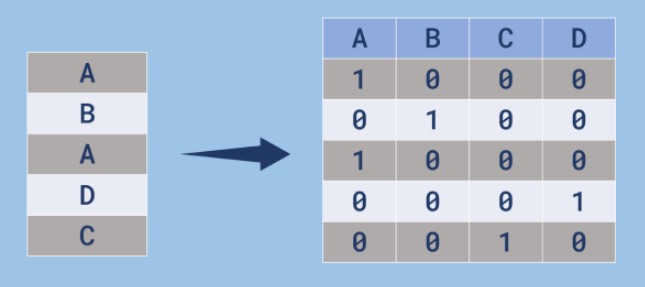

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/transformacao.png'))

Com a transformação feita, nossos dados serão representados da seguinte maneira:

In [ ]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__sexo_biologico_Mulher,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


Depois de transformar as variáveis explicativas, resta transformar a variável alvo. Vamos utilizar o *LabelEncoder*, que é o método recomendado para essa tarefa.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_ecoder = LabelEncoder()
y = label_ecoder.fit_transform(y)

# Validando o modelo

Avaliar os modelos com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo. Isso não significa que o modelo que construímos memorizou o resultado.

Então, precisamos fazer uma validação de forma mais coerente. Precisamos passar novos dados para o modelo fazer a classificação. E nesses dados, já conheceremos a resposta, e poderemos comparar a resposta que o modelo deu para esses dados com as respostas reais e verificar se, de fato, está acertando. Dessa maneira, entenderemos se o modelo está aprendendo, ou seja, se está generalizando para novos dados ou não.

Para realizar essa tarefa de validação, podemos dividir nossos dados em duas partes: uma parte de treinamento e uma parte de teste. Ainda podemos utilizar outra estratégia, em vez de dividir nossos dados em apenas duas partes, vamos dividi-los em três: treinamento, validação e teste.

Qual a diferença de utilizar essas duas estratégias?

Na primeira, onde temos apenas treino e teste, vamos treinar o modelo na base de dados de treinamento e avaliar na base de dados de teste, que são dados que não foram usados no treinamento, sendo assim, verificaremos se o modelo está fazendo a generalização.

Na segunda estratégia, que separa entre treino, validação e teste, deixamos uma parte de teste separada durante todo o projeto e fazemos a validação do modelo no conjunto de dados de validação.

- o conjunto de treinamento é utilizado para treinar o modelo. O modelo vai entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

Para fazer essa divisão entre dados de treino, validação e teste, utilizaremos uma função da biblioteca scikit-learn chamada *train_test_split*. Porém, esta função permite somente a separação dos dados em treino e teste. Então, primeiramente faremos uma divisão que inclui treino e validação juntos, e teste separado. Em seguida, iremos subdividir os dados de treino e validação em duas partes.

Além disso, usamos o parâmetro *stratify* para estratificar os nossos dados. Isso significa que manteremos as proporções de pessoas que cancelaram suas contas (churn = 1) e não cancelaram suas contas (churn = 0) no banco nesses dois conjuntos de dados.

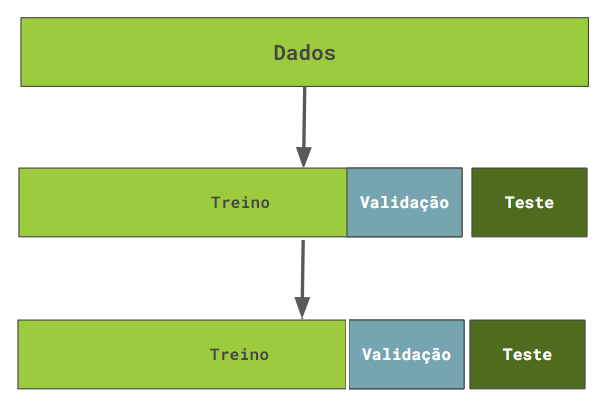

In [ ]:
from IPython.display import Image, display
display(Image(filename='separacao_triplav2.png'))

In [ ]:
from sklearn.model_selection import train_test_split
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 5)

x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

# Algoritmo de Machine Learning

Para testar nosso modelo utilizaremos o algoritmo *DecisionTreeClassifier*. Vamos treinar e ajustá-lo com os dados de treino e avaliar o resultado nos dados de validação. Os dados de teste (as variáveis x_teste e y_teste) ficarão separados e não serão utilizados agora, guardaremos para um momento posterior.

Basicamente, a árvore compara se um valor é maior ou menor a partir dos valores de uma coluna do dataframe, e separa os dados com base no resultado dessa comparação. Portanto, aqueles dados que tiverem um valor maior que o valor estipulado pela árvore serão separados em um grupo, e aqueles que tiverem um valor menor serão separados em um grupo diferente.

A árvore não toma apenas uma decisão. Conforme são tomadas as decisões, são feitas novas subdivisões, escolhendo novos índices. Uma vez separados todos os dados, a árvore aprende o padrão dos dados e cria uma regra que será utilizada na classificação de novos dados.

Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Criaremos um modelo de árvore de decisão com o parâmetro *max_depth=4*, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método plot_tree. Abaixo como o algoritmo montou a "árvore" para tomar as decisões.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth = 8, random_state = 5)
arvore.fit(x_treino, y_treino)

print(f'Acurácia de treino Árvore: {round(arvore.score(x_treino, y_treino)*100, 2)}%')
print(f'Acurácia de validação: {round(arvore.score(x_val, y_val)*100, 2)}%')

Acurácia de treino Árvore: 88.4%
Acurácia de validação: 85.0%


## Matriz de confusão

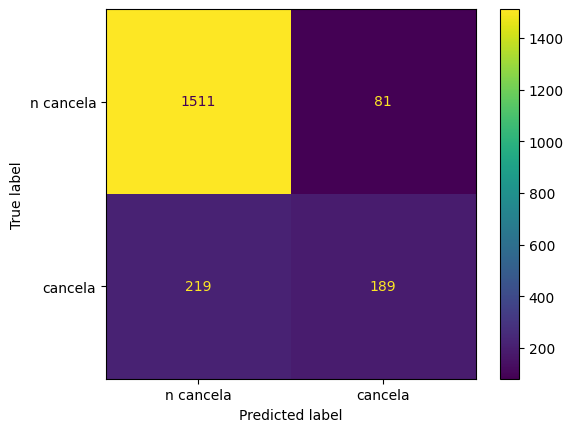

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_previsto = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['n cancela', 'cancela']);
visualizacao.plot()

# Exportando o modelo

O próximo passo é selecionar o modelo de árvore de decisão para utilizar em um ambiente externo. Para isso, vamos precisar armazenar esse modelo em um arquivo utilizando a biblioteca Pickle.

Vamos armazenar também o *OneHotEncoder* que é o modelo de transformação. Isso porque, no sistema original, os dados estão em um formato diferente do que utilizamos. Portanto, precisamos armazenar as transformações que fizemos para serem aplicadas em novos dados.

In [ ]:
import pickle

with open('modelo_onehot.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

Agora, que já temos os modelos armazenados, poderemos aplicá-los em um novo dado que está no sistema do banco. Para ilustrar, vamos mostrar como é o formato dos nossos dados e simular a inserção de um novo dado com as características já conhecidas. Lembrando que precisamos transformar esse novo dado com o *OneHotEncoder* antes de fazer a classificação.

In [ ]:
novo_dado = {
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': [1],
    'membro_ativo': [1],
    'salario_estimado': [85270.00]
}

In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,850,França,Homem,27,3,56000,1,1,1,85270.0


Este é um cliente que queremos classificar, ou seja, queremos saber se ele tem chance de cancelar a conta no nosso banco, afim de realizar ações contra esse possível cancelamento.

Primeiro, vamos atribuir a variável modelo_one_hot à leitura do arquivo utilizando a função pd.read_pickle(). A biblioteca pandas possui uma função capaz de ler este tipo de arquivo, que é a função read_pickle.

In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehot.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

Ao executar essa célula, estamos lendo o modelo de árvore. Todo o padrão que foi construído em nosso projeto foi armazenado em um arquivo e agora estamos lendo este arquivo. Podemos utilizar esses modelos para fazer a previsão.

Então, vamos usar esse modelo_one_hot, fazendo a transformação desses novos dados e, em seguida, passamos essa transição para o modelo de árvore para realizar a previsão. Neste sentido, novo_dado será igual a modelo_onehot.transform(novo_dado). Dessa forma, primeiro faremos a transformação dos dados. E na mesma célula, vamos utilizar o modelo de árvore de decisão com modelo_arvore.predict(novo_dado).

In [ ]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([0])

Como resultado obtivemos o rótulo = 0, ou seja, o cliente testado pelo modelo árvore de decisão provalmente não cancelaria sua conta no banco.